In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import os,sys
parent_directory = os.path.dirname(os.getcwd())
sys.path.append(parent_directory)
import telescope_1d
%matplotlib inline

In [2]:
class vps:
    def __init__ (self,npix=4096, ndishes=16, redundant = True, sigt='sig', terr = 'ct0', Nf = 1):
        redstr = 'red' if redundant else 'nred'
        if Nf>0:
            fname = f"../outp/{ndishes}_{npix}_{redstr}_{sigt}_{terr}_{Nf}" 
        else:
            fname = f"../outp/{ndishes}_{npix}_{redstr}_{sigt}_{terr}" 
        self.ps, self.psf, self.psfx, self.psf1,self.psf1x = np.load(fname+'.npy') 
        self.ks = np.load(fname+'_kmodes.npy') 
        self.bs = np.load(fname+'_baselines.npy')
        self.rf = self.psfx/np.sqrt(self.ps*self.psf)
        self.rf1 = self.psf1x/np.sqrt(self.ps*self.psf1)
    
    def plotX (self, what = 'f1x', chunk=0, title=None, vmin=None, vmax=None, 
               log=None, colorbar=True):
        login=log
        log=False
        if type(what)==np.ndarray:
            toplot = what[chunk]
            log=True
        elif what == 'fx':
            title= 'cross-corr coefficient'
            toplot = self.rf[chunk]#psfx[chunk]/np.sqrt(self.ps[chunk]*self.psf[chunk])
        elif what == 'f1x':
            title= 'cross-coefficient'
            toplot = self.rf1[chunk]#self.psf1x[chunk]/np.sqrt(self.ps[chunk]*self.psf1[chunk])
        elif what == 'fo':
            toplot = self.psf[chunk]/self.ps[chunk]
            log=True
        elif what == 'f1o':
            toplot = self.psf1[chunk]/self.ps[chunk]
            title='ratio of power spectra'
            log=True

        if login is not None:
            log = login
        extent=(0.5,toplot.shape[1]+0.5,self.ks[chunk,0],self.ks[chunk,-1])    
        print(extent)
        if not log:
            plt.imshow(toplot,origin='lower',extent=extent,aspect='auto',interpolation='nearest',vmin=vmin,vmax=vmax)
        else:
            plt.imshow(toplot,origin='lower',extent=extent,aspect='auto',interpolation='nearest',norm=LogNorm(),vmin=vmin,vmax=vmax)

        plt.ylabel('$k_\parallel [h/\\rm Mpc]$')
        plt.xlabel('${\\rm baseline}$')
        plt.title(title)
        if colorbar:
            plt.colorbar()
        

(0.5, 15.5, 0.0, 0.7344291411026488)
(0.5, 15.5, 0.0, 0.7344291411026488)
(0.5, 15.5, 0.0, 0.7344291411026488)
(0.5, 15.5, 0.0, 0.7344291411026488)


<ipython-input-2-084c4b689b32>:42: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.imshow(toplot,origin='lower',extent=extent,aspect='auto',interpolation='nearest',norm=LogNorm(),vmin=vmin,vmax=vmax)


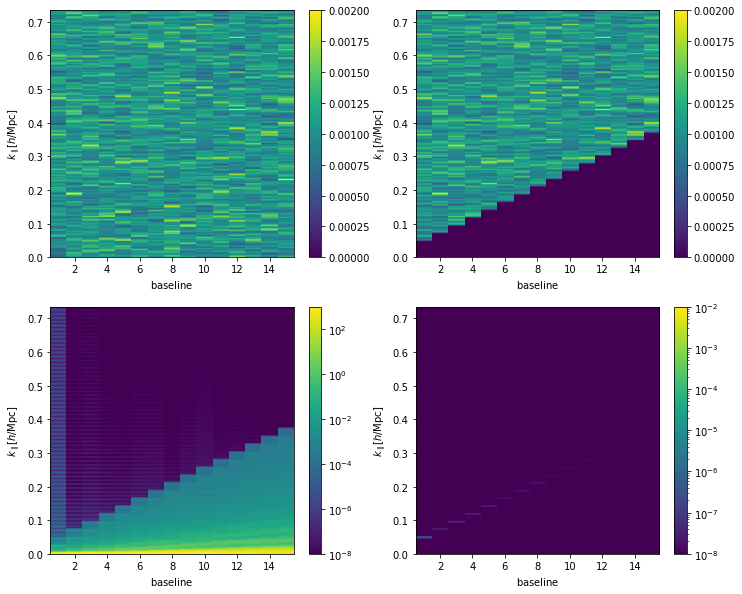

In [3]:
## per baseline filtering 
##
## Table : sig_before sig_after
##         for_before for_after

ds=vps(ndishes=16, redundant=True,sigt='sig',Nf=1)
df=vps(ndishes=16, redundant=True,sigt='unif',Nf=1)
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
ds.plotX(100*ds.ps,log=False,vmin=-0.00,vmax=+0.002)
plt.subplot(2,2,2)
ds.plotX(100*ds.psf1,log=False,vmin=0,vmax=+0.002)
plt.subplot(2,2,3)
df.plotX(df.ps,vmin=1e-8,vmax=1e3)
plt.subplot(2,2,4)
df.plotX(df.psf1,vmin=1e-8,vmax=1e-2)


(0.5, 15.5, 0.0, 0.7344291411026488)
(0.5, 15.5, 0.0, 0.7344291411026488)
(0.5, 15.5, 0.0, 0.7344291411026488)
(0.5, 15.5, 0.0, 0.7344291411026488)


<ipython-input-2-084c4b689b32>:42: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.imshow(toplot,origin='lower',extent=extent,aspect='auto',interpolation='nearest',norm=LogNorm(),vmin=vmin,vmax=vmax)


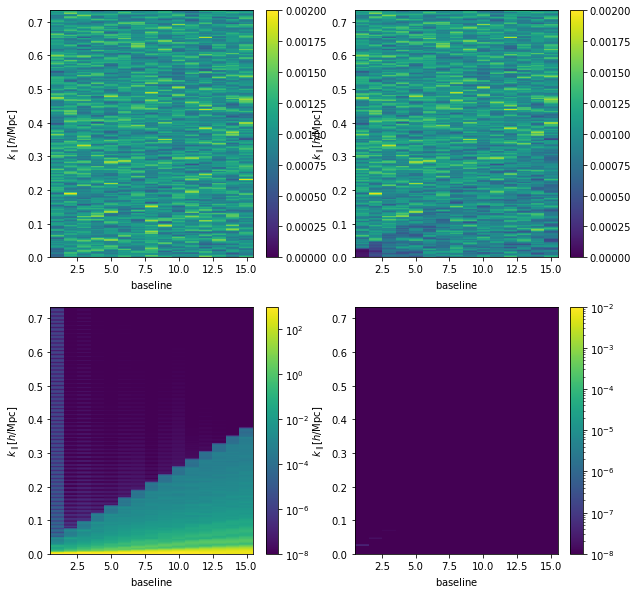

In [4]:
##
## Same as before but per array filtering
##

ds=vps(ndishes=16, redundant=True,sigt='sig',Nf=1)
df=vps(ndishes=16, redundant=True,sigt='unif',Nf=1)
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
ds.plotX(100*ds.ps,log=False,vmin=-0.00,vmax=+0.002)
plt.subplot(2,2,2)
ds.plotX(100*ds.psf,log=False,vmin=-0.000,vmax=+0.002)
plt.subplot(2,2,3)
df.plotX(df.ps,vmin=1e-8,vmax=1e3)
plt.subplot(2,2,4)
df.plotX(df.psf,vmin=1e-8,vmax=1e-2)


(0.5, 15.5, 0.0, 0.7344291411026488)
(0.5, 15.5, 0.0, 0.7344291411026488)


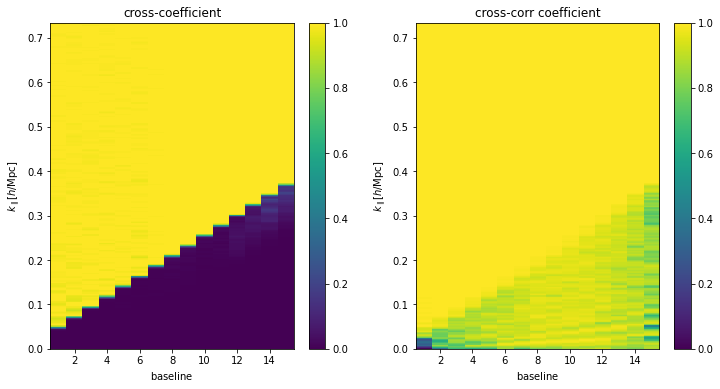

In [5]:
## signal loss in terms of cross-power spectra
## Px = P_cross/ sqrt(P_auto * P_auto)
ds=vps(ndishes=16, redundant=True,sigt='sig',Nf=1)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
ds.plotX('f1x',vmin=0,vmax=1.0)
plt.subplot(1,2,2)
ds.plotX('fx',vmin=0, vmax=1.0)

(0.5, 3.5, 0.0, 0.7344291411026488)
(0.5, 7.5, 0.0, 0.7344291411026488)
(0.5, 11.5, 0.0, 0.7344291411026488)
(0.5, 15.5, 0.0, 0.7344291411026488)
(0.5, 19.5, 0.0, 0.7344291411026488)


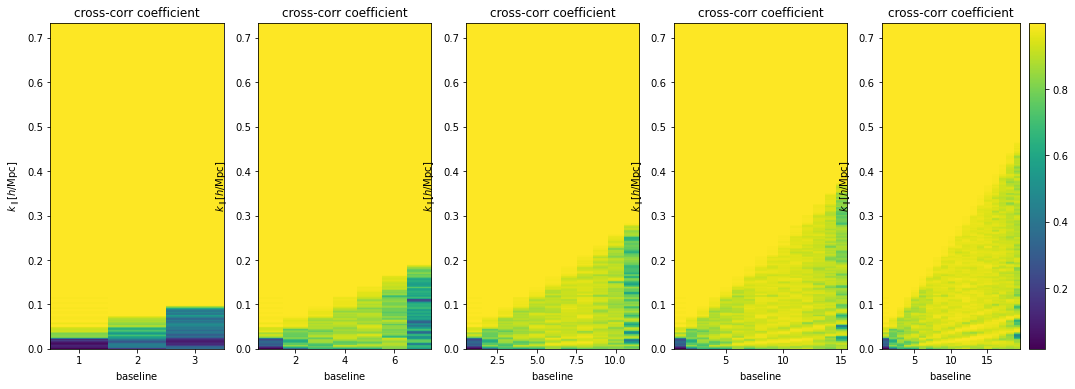

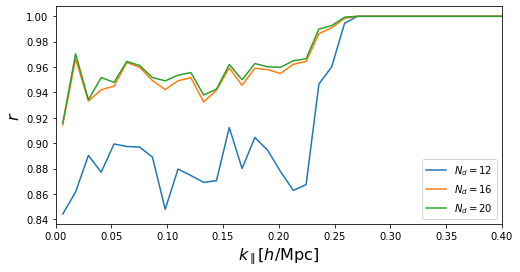

In [6]:
### bigger arrays do better
plt.figure(figsize=(18,6))
for i,v in enumerate([4,8,12,16,20]):
    plt.subplot(1,5,i+1)
    colorbar = (v==20)
        
    ds=vps(ndishes=v, redundant=True,sigt='sig',Nf=1)
    ds.plotX('fx',colorbar=colorbar)

plt.figure(figsize=(8,4))
for i,v in enumerate([12,16,20]):
    colorbar = (v==20)
        
    ds=vps(ndishes=v, redundant=True,sigt='sig',Nf=1)
    plt.plot(ds.ks[0][1:].reshape((-1,8)).mean(axis=1),ds.rf[0][1:,9].reshape((-1,8)).mean(axis=1),label=f'$N_d={v}$')
    plt.xlim(0,0.5)
    plt.xlabel('$k_\parallel [h/\\rm Mpc]$',fontsize=16)
    plt.ylabel('$r$',fontsize=16)
    plt.legend()
    plt.xlim(0,0.4)

(0.5, 15.5, 0.0, 0.7344291411026488)
(0.5, 52.5, 0.0, 0.7344291411026488)


Text(0.5, 0, '')

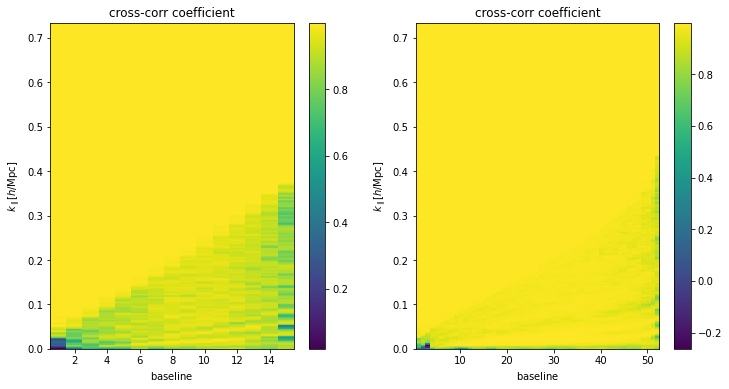

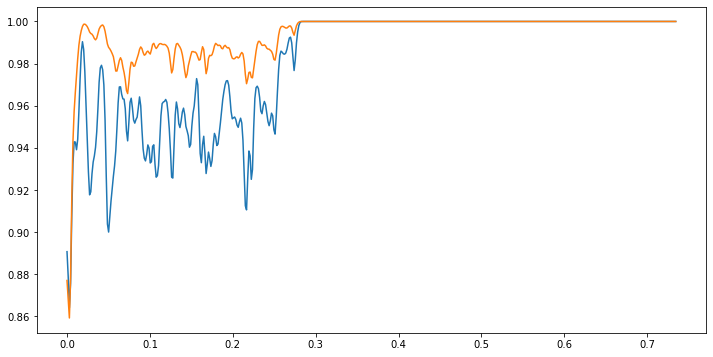

In [7]:

### redundant vs non-redundant
dsr=vps(ndishes=16, redundant=True,sigt='sig',Nf=1)
dsnr=vps(ndishes=16, redundant=False,sigt='sig',Nf=1)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
dsr.plotX('fx')
plt.subplot(1,2,2)
dsnr.plotX('fx')

plt.figure(figsize=(12,6))


plt.plot(dsr.ks[0],dsr.rf[0][:,10])
plt.plot(dsnr.ks[0],dsnr.rf[0][:,37])
plt.xlabel('')

(0.5, 15.5, 0.0, 0.7344291411026488)
(0.5, 15.5, 0.0, 0.7344291411026488)
(0.5, 15.5, 0.0, 0.7344291411026488)
(0.5, 15.5, 0.0, 0.7344291411026488)


<ipython-input-2-084c4b689b32>:42: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.imshow(toplot,origin='lower',extent=extent,aspect='auto',interpolation='nearest',norm=LogNorm(),vmin=vmin,vmax=vmax)


(0.5, 15.5, 0.0, 0.7344291411026488)
(0.5, 15.5, 0.0, 0.7344291411026488)


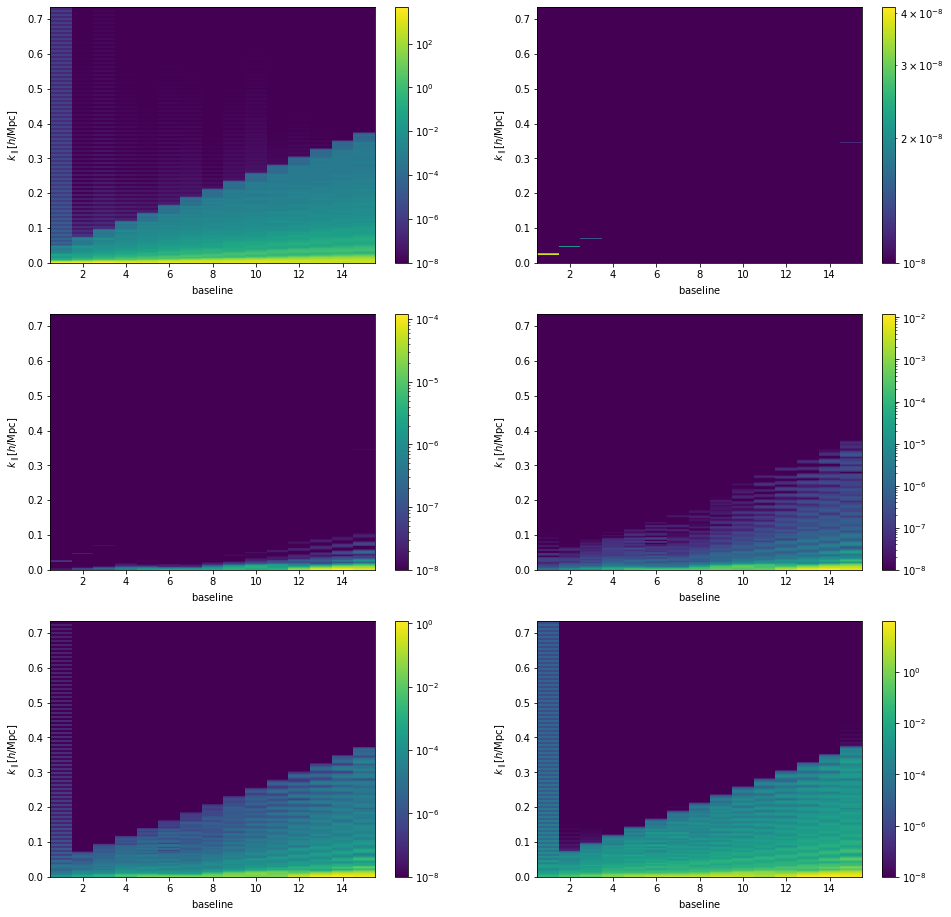

In [8]:

plt.figure(figsize=(16,16))
plt.subplot(3,2,1)
d=vps(ndishes=16, redundant=True,sigt='unif',Nf=1)
d.plotX(d.ps,vmin=1e-8)

for i,d in enumerate([0,0.1,1.0,10.0,100.0]):
    plt.subplot(3,2,2+i)
    d=vps(ndishes=16, redundant=True,sigt='unif',terr=f'ct{d}',Nf=1)
    d.plotX(d.psf,vmin=1e-8)


Text(0.5, 1.0, 'Baseline 10 (66 meters)')

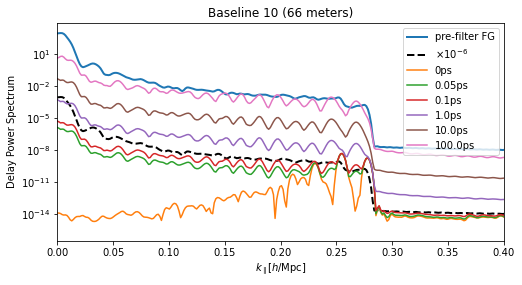

In [15]:
## now make a more readable plot, pick baseline 10
plt.figure(figsize=(8,4))
d=vps(ndishes=16, redundant=True,sigt='unif',Nf=1)
plt.plot(d.ks[0],d.ps[0][:,10],lw=2,label='pre-filter FG')
plt.plot(d.ks[0],d.ps[0][:,10]*1e-6,'k--',lw=2,label='$\\times 10^{-6}$')
for i,de in enumerate([0,0.05,0.1,1.0,10.0,100.0]):
    d=vps(ndishes=16, redundant=True,sigt='unif',terr=f"ct{de}",Nf=1)
    plt.plot(d.ks[0],d.psf[0][:,10],label=f'{de}ps')
plt.xlim(0,0.4)
plt.legend()
plt.semilogy()
plt.xlabel('$k_\parallel [h/\\rm Mpc]$')
plt.ylabel("Delay Power Spectrum")
plt.title('Baseline 10 (66 meters)')

Text(0.5, 1.0, 'Baseline 10 (66 meters)')

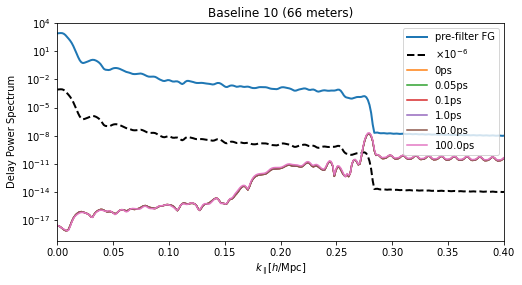

In [17]:
## Same plot for per-baseline filtering
plt.figure(figsize=(8,4))
d=vps(ndishes=16, redundant=True,sigt='unif',Nf=1)
plt.plot(d.ks[0],d.ps[0][:,10],lw=2,label='pre-filter FG')
plt.plot(d.ks[0],d.ps[0][:,10]*1e-6,'k--',lw=2,label='$\\times 10^{-6}$')
for i,de in enumerate([0,0.05,0.1,1.0,10.0,100.0]):
    d=vps(ndishes=16, redundant=True,sigt='unif',terr=f"ut{de}",Nf=1)
    plt.plot(d.ks[0],d.psf1[0][:,10],label=f'{de}ps')
plt.xlim(0,0.4)
plt.legend()
plt.semilogy()
plt.xlabel('$k_\parallel [h/\\rm Mpc]$')
plt.ylabel("Delay Power Spectrum")
plt.title('Baseline 10 (66 meters)')

Text(0, 0.5, 'Delay Power Spectrum')

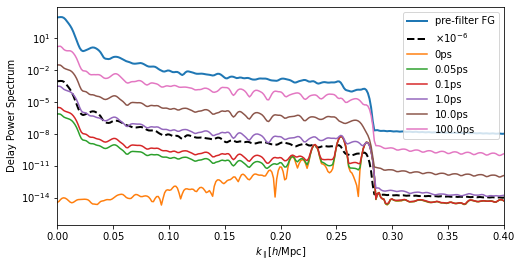

In [19]:
## is the 20 array better?
plt.figure(figsize=(8,4))
d=vps(ndishes=20, redundant=True,sigt='unif',Nf=1)
plt.plot(d.ks[0],d.ps[0][:,10],lw=2,label='pre-filter FG')
plt.plot(d.ks[0],d.ps[0][:,10]*1e-6,'k--',lw=2,label='$\\times 10^{-6}$')
for i,de in enumerate([0,0.05,0.1,1.0,10.0,100.0]):
    d=vps(ndishes=20, redundant=True,sigt='unif',terr=f"ut{de}",Nf=1)
    plt.plot(d.ks[0],d.psf[0][:,10],label=f'{de}ps')
plt.xlim(0,0.4)
plt.legend()
plt.semilogy()
plt.xlabel('$k_\parallel [h/\\rm Mpc]$')
plt.ylabel("Delay Power Spectrum")

Text(0, 0.5, 'Delay Power Spectrum')

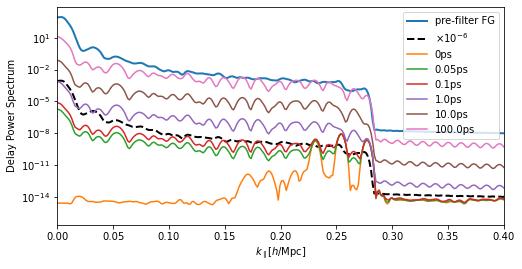

In [20]:
## is the non redundant array better (baseline 37 is the same length)
plt.figure(figsize=(8,4))
d=vps(ndishes=16, redundant=False,sigt='unif',Nf=1)
plt.plot(d.ks[0],d.ps[0][:,37],lw=2,label='pre-filter FG')
plt.plot(d.ks[0],d.ps[0][:,37]*1e-6,'k--',lw=2,label='$\\times 10^{-6}$')
for i,de in enumerate([0,0.05,0.1,1.0,10.0,100.0]):
    d=vps(ndishes=16, redundant=False,sigt='unif',terr=f"ut{de}",Nf=1)
    plt.plot(d.ks[0],d.psf[0][:,37],label=f'{de}ps')
plt.xlim(0,0.4)
plt.legend()
plt.semilogy()
plt.xlabel('$k_\parallel [h/\\rm Mpc]$')
plt.ylabel("Delay Power Spectrum")

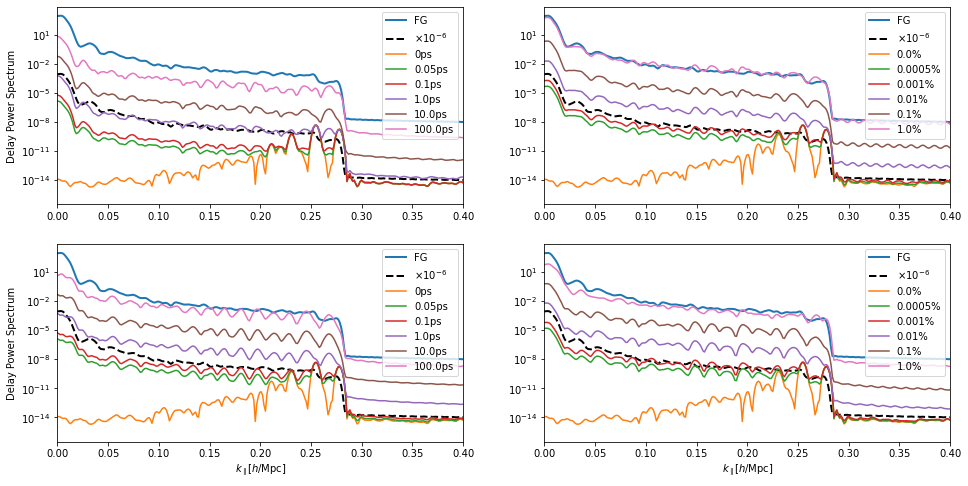

In [33]:
## now make a more readable plot, pick baseline 10
plt.figure(figsize=(16,8))
d=vps(ndishes=16, redundant=True,sigt='unif',Nf=1)
cc=0
for co in 'uc':
    for ty in 'ta':
        lab = 'ps' if ty=="t" else "%"
        cc+=1
        plt.subplot(2,2,cc)
        plt.plot(d.ks[0],d.ps[0][:,10],lw=2,label='FG')
        plt.plot(d.ks[0],d.ps[0][:,10]*1e-6,'k--',lw=2,label='$\\times 10^{-6}$')
        for i,de in enumerate([0,0.05,0.1,1.0,10.0,100.0]):
            dx=vps(ndishes=16, redundant=True,sigt='unif',terr=f"{co}{ty}{de}",Nf=1)
            dex = de if ty=="t" else 0.01*de
            plt.plot(dx.ks[0],dx.psf[0][:,10],label=f'{dex}{lab}')
        plt.xlim(0,0.4)
        plt.legend()
        plt.semilogy()
#plt.subplot(1,1,1)
        if (cc>2):
            plt.xlabel('$k_\parallel [h/\\rm Mpc]$')
        if (cc%2==1):
            plt.ylabel("Delay Power Spectrum")
        #plt.title('Baseline 10 (66 meters)')

/here/telescope_1d.py:283: RuntimeWarning: covariance is not positive-semidefinite.
  errors = np.random.multivariate_normal(mean,cov)


Text(0, 0.5, 'error')

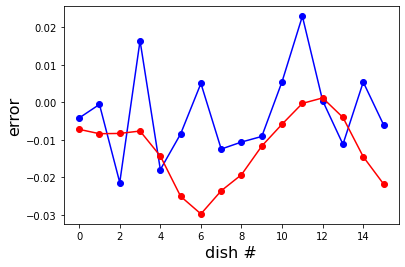

In [13]:
t=telescope_1d.Telescope1D(Ndishes=16)
eu=t.get_errors(error_sigma=0.01,correlated=False,seed=2)
ec=t.get_errors(error_sigma=0.01,correlated=True,seed=0)

plt.plot(eu,'bo-',label='uncorrealted')
plt.plot(ec,'ro-',label='correlated')
plt.xlabel('dish #',fontsize=16)
plt.ylabel('error',fontsize=16)